##LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from scipy.stats import ttest_ind

In [3]:
from scipy.stats import f_oneway

In [4]:
import scipy.stats as stats

In [5]:
import statsmodels.api as sm

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##UPLOAD AND LOAD DATASETS

In [8]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [9]:
fear_greed_df = pd.read_csv('fear_greed_index.csv')
historical_df = pd.read_csv('historical_data.csv')


In [10]:
fear_greed_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [11]:
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [12]:
historical_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [13]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [14]:
print("Fear-Greed rows:", fear_greed_df.shape[0])
print("historical rows:", historical_df.shape[0])


Fear-Greed rows: 2644
historical rows: 211224


##DATA CLEANING,PREPARING AND PRE-PROCESSING

#Data Cleaning

In [15]:
fear_greed_df.columns = fear_greed_df.columns.str.strip().str.lower().str.replace(' ', '_')
historical_df.columns = historical_df.columns.str.strip().str.lower().str.replace(' ', '_')


In [16]:
print(fear_greed_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [17]:
print(historical_df.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')


#Checking and Handling Missing Values

In [18]:
print(fear_greed_df.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [19]:
print(historical_df.isnull().sum())

account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
dtype: int64


#Convert date columns to datetime

In [20]:
# Convert fear_greed date
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date']).dt.date


In [21]:
# Convert timestamp columns first
historical_df['timestamp_ist'] = pd.to_datetime(historical_df['timestamp_ist'], errors='coerce')
historical_df['date'] = historical_df['timestamp_ist'].dt.date




#Merge

In [22]:

merged_df = pd.merge(
    historical_df,
    fear_greed_df[['date', 'classification', 'value']],
    on='date',
    how='inner'
)

In [23]:
merged_df.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed,70
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed,70
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed,70
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed,70
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed,70


In [ ]:
merged_df.to_csv('merged_data.csv', index=False)


##EXPLORATORY DATA ANALYSIS

#Correlation Heatmap

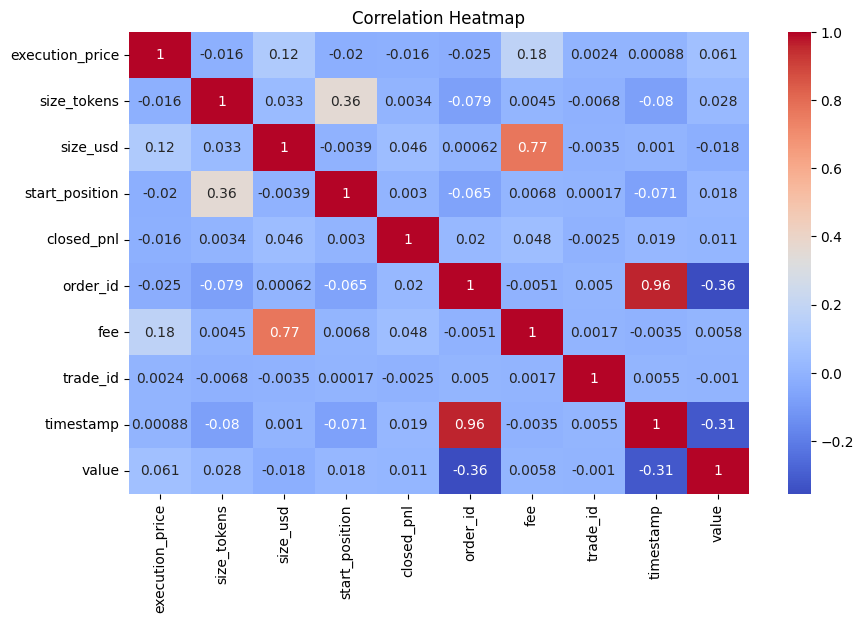

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(merged_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#Distribution of Market Sentiment

/tmp/ipython-input-37-833155364.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fear_greed_df, x='classification', palette='coolwarm')


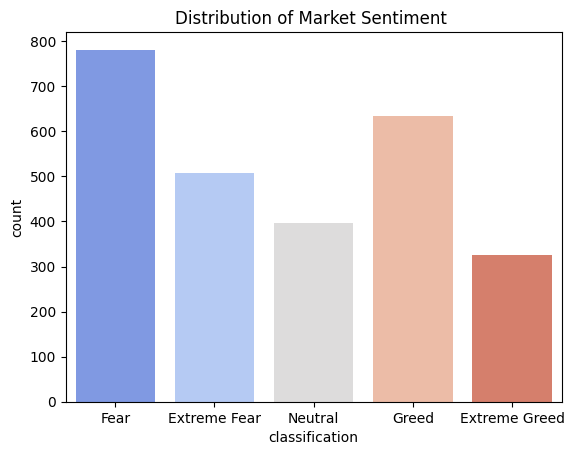

In [37]:
sns.countplot(data=fear_greed_df, x='classification', palette='coolwarm')
plt.title("Distribution of Market Sentiment ")
plt.show()

#Line Plot: Fear & Greed Index Over Time

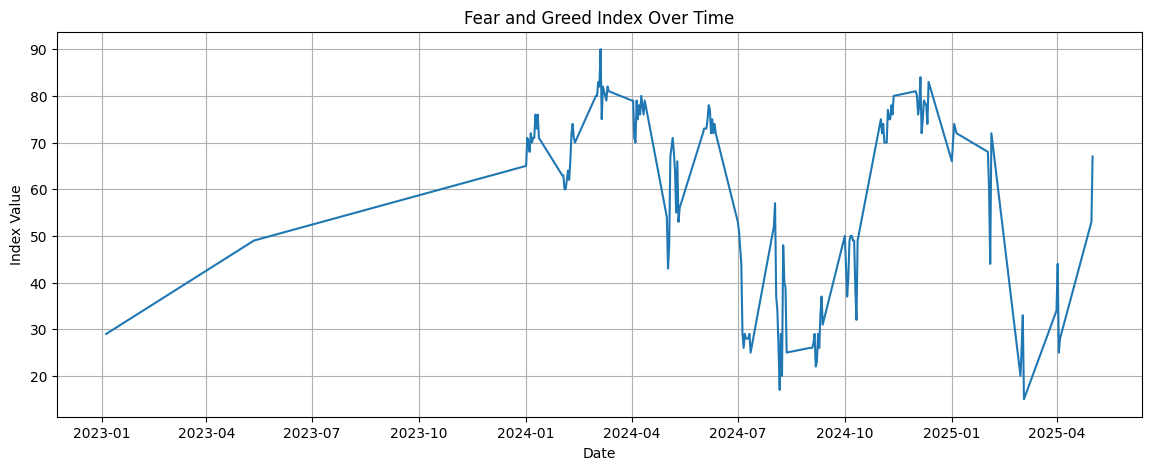

In [38]:
plt.figure(figsize=(14, 5))
merged_df.groupby('date')['value'].mean().plot()
plt.title('Fear and Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.show()

#Boxplot: PnL vs Sentiment Score Buckets

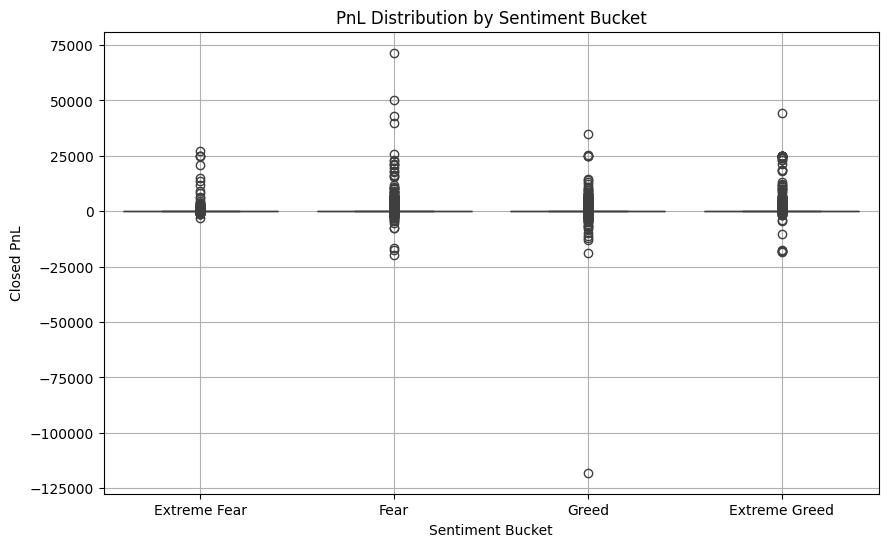

In [39]:
# Create sentiment buckets
merged_df['sentiment_bucket'] = pd.cut(
    merged_df['value'],
    bins=[0, 25, 50, 75, 100],
    labels=['Extreme Fear', 'Fear', 'Greed', 'Extreme Greed']
)

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_bucket', y='closed_pnl', data=merged_df)
plt.title('PnL Distribution by Sentiment Bucket')
plt.ylabel('Closed PnL')
plt.xlabel('Sentiment Bucket')
plt.grid(True)
plt.show()

#Trend Line: Trade Volume vs Fear-Greed Value

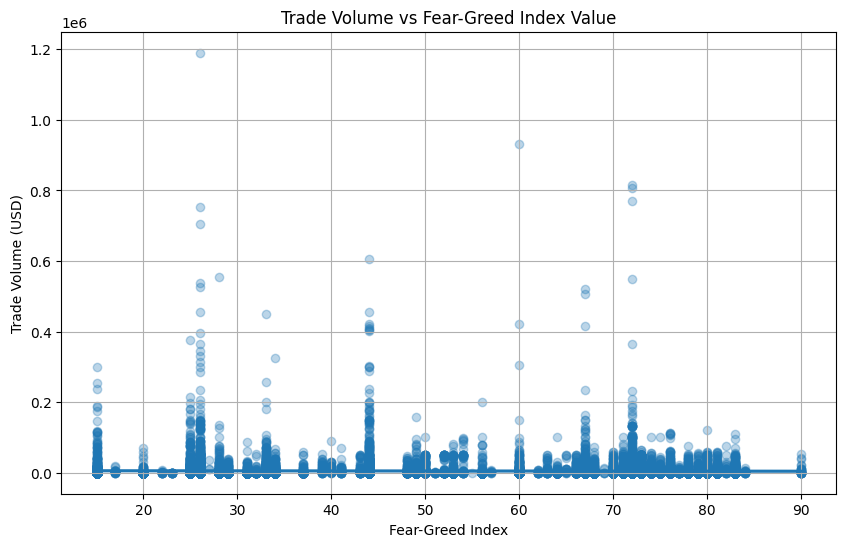

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(x='value', y='size_usd', data=merged_df, scatter_kws={'alpha':0.3})
plt.title('Trade Volume vs Fear-Greed Index Value')
plt.xlabel('Fear-Greed Index')
plt.ylabel('Trade Volume (USD)')
plt.grid(True)
plt.show()

#Trader Activity Over Time

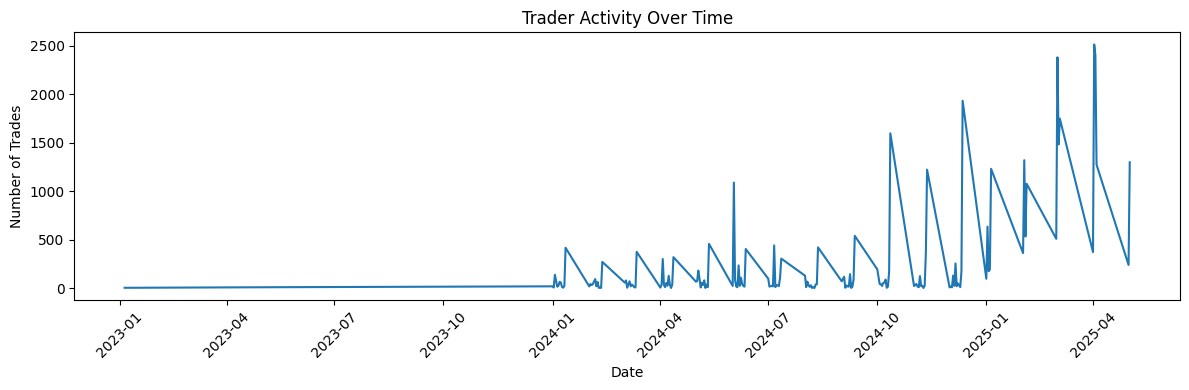

In [41]:
daily_trades = merged_df.groupby(['date']).size().reset_index(name='num_trades')

plt.figure(figsize=(12,4))
sns.lineplot(data=daily_trades, x='date', y='num_trades')
plt.title('Trader Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Distribution of PnL

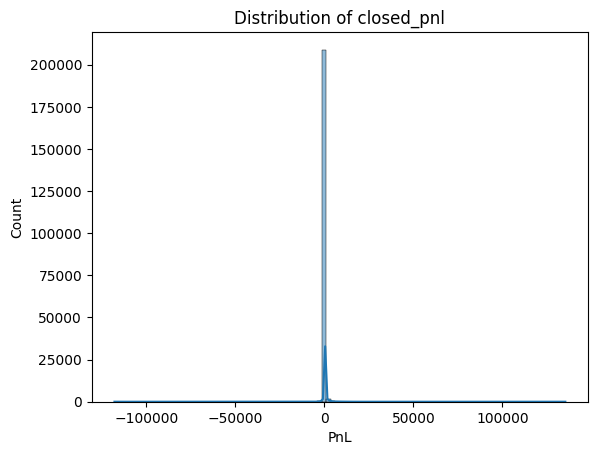

In [42]:
sns.histplot(historical_df['closed_pnl'], bins=100, kde=True)
plt.title("Distribution of closed_pnl")
plt.xlabel("PnL")
plt.show()


#PnL Distribution by Sentiment

/tmp/ipython-input-43-2276110903.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='closed_pnl', palette='Set2')


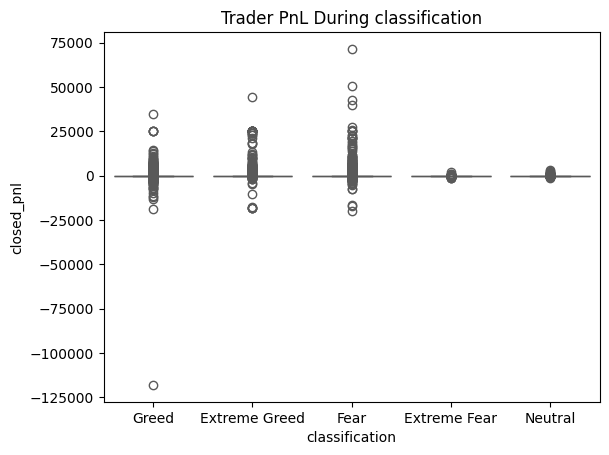

In [43]:
sns.boxplot(data=merged_df, x='classification', y='closed_pnl', palette='Set2')
plt.title("Trader PnL During classification")
plt.ylabel("closed_pnl")
plt.show()

#Number of Trades by Sentiment

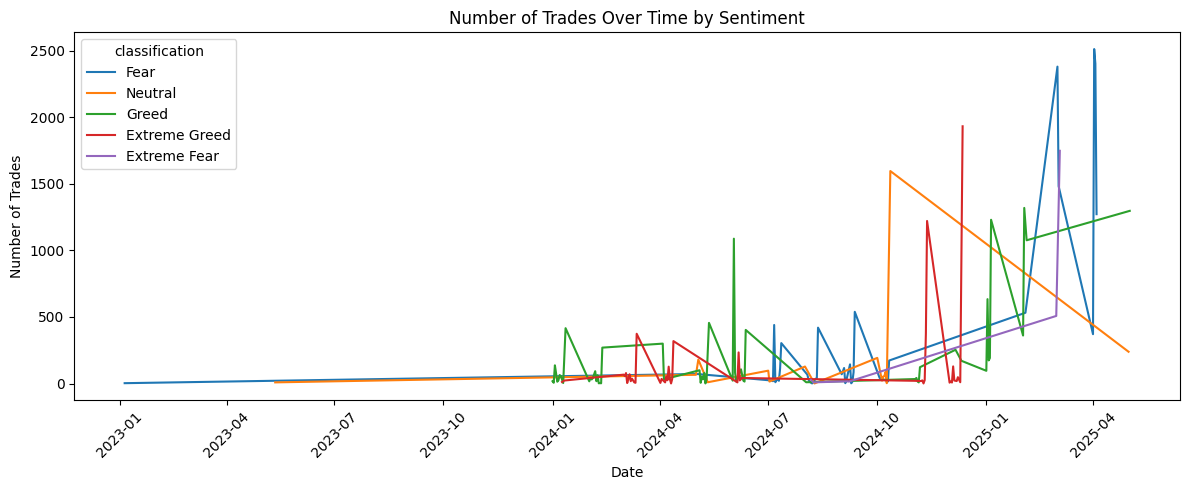

In [44]:
trades_per_day = merged_df.groupby(['date', 'classification']).size().reset_index(name='num_trades')

plt.figure(figsize=(12,5))
sns.lineplot(data=trades_per_day, x='date', y='num_trades', hue='classification')
plt.title('Number of Trades Over Time by Sentiment')
plt.xlabel('Date')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#PnL Trend Over Time

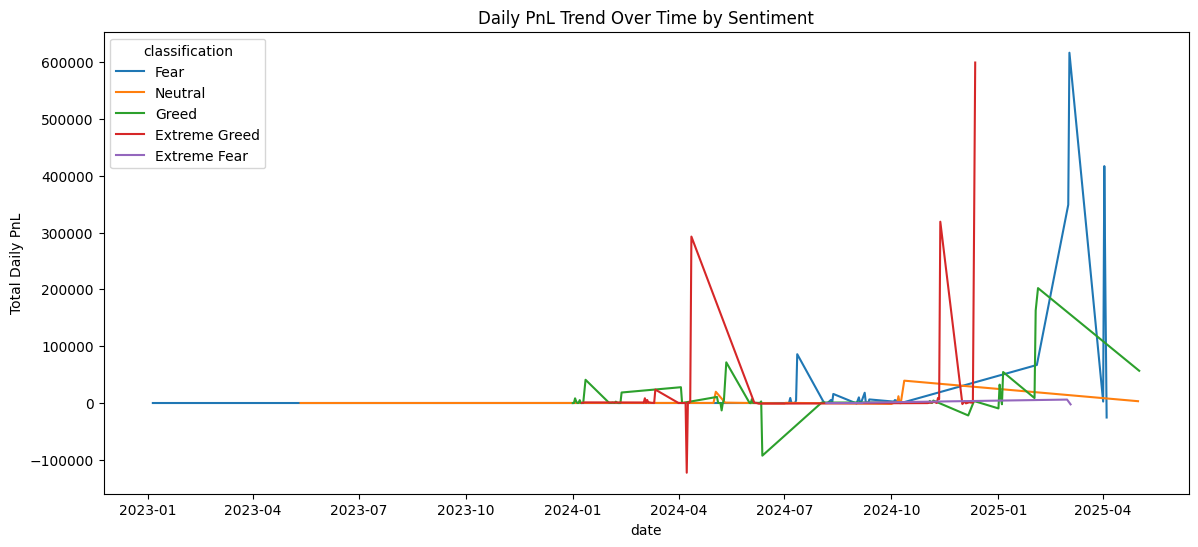

In [45]:
pnl_over_time = merged_df.groupby(['date', 'classification'])['closed_pnl'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=pnl_over_time, x='date', y='closed_pnl', hue='classification')
plt.title("Daily PnL Trend Over Time by Sentiment")
plt.ylabel("Total Daily PnL")
plt.show()

#Trade Volume by Sentiment

/tmp/ipython-input-46-72937765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trade_volume, x='classification', y='size_usd', palette='viridis')


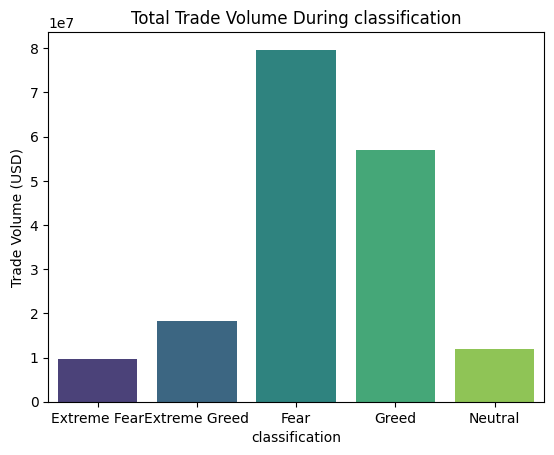

In [46]:
trade_volume = merged_df.groupby('classification')['size_usd'].sum().reset_index()

sns.barplot(data=trade_volume, x='classification', y='size_usd', palette='viridis')
plt.title("Total Trade Volume During classification")
plt.ylabel("Trade Volume (USD)")
plt.show()


#Volume distribution

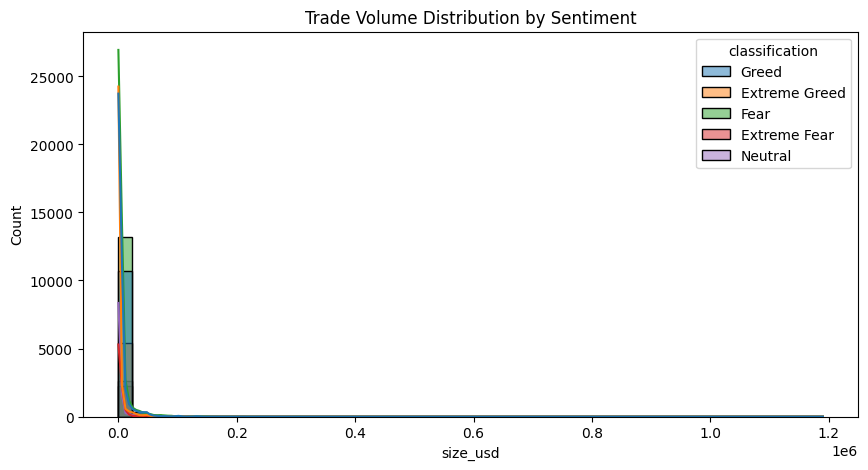

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(data=merged_df, x='size_usd', hue='classification', kde=True, bins=50)
plt.title('Trade Volume Distribution by Sentiment')
plt.show()

#PnL Distribution by Sentiment

  classification  closed_pnl
0          Greed         0.0
1          Greed         0.0
2          Greed         0.0
3          Greed         0.0
4          Greed         0.0
0


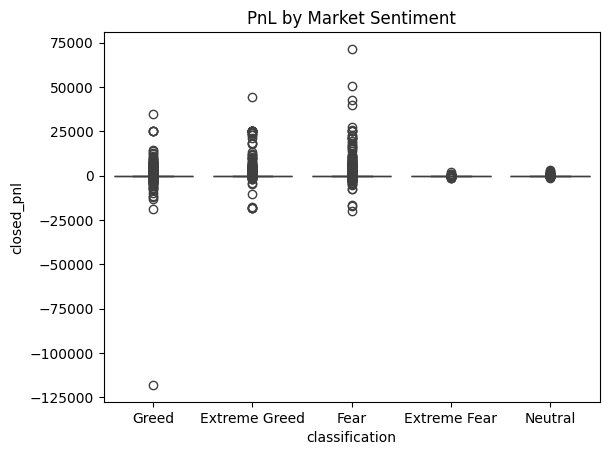

In [48]:
print(merged_df[['classification', 'closed_pnl']].head())

# Check for NaNs:
print(merged_df['closed_pnl'].isna().sum())

# Now plot:
sns.boxplot(data=merged_df, x='classification', y='closed_pnl')
plt.title("PnL by Market Sentiment")
plt.show()

##STATISTICAL ANALYSIS

#ANOVA test

In [49]:
groups = [group['closed_pnl'].values for name, group in merged_df.groupby('classification')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA result: F = {f_stat:.4f}, p = {p_val:.4f}")

ANOVA result: F = 18.1509, p = 0.0000


#ANOVA Test: PnL vs Sentiment Classification

In [50]:
# Drop missing PnL values first
merged_df = merged_df.dropna(subset=['closed_pnl', 'classification'])

# Group 'closed_pnl' values by each sentiment classification
grouped_pnl = merged_df.groupby('classification')['closed_pnl'].apply(list)

# Ensure there are enough values in each group (optional)
grouped_pnl = [vals for vals in grouped_pnl if len(vals) > 10]

# Perform ANOVA
f_stat_pnl, p_val_pnl = f_oneway(*grouped_pnl)

print("ANOVA Test: Does PnL differ significantly across sentiment groups?")
print(f"F-statistic: {f_stat_pnl:.4f}")
print(f"P-value: {p_val_pnl:.4f}")

if p_val_pnl < 0.05:
    print("✅ Result: Statistically significant difference in PnL across at least one sentiment group.")
else:
    print("❌ Result: No significant difference in PnL across sentiment groups.")

ANOVA Test: Does PnL differ significantly across sentiment groups?
F-statistic: 18.1509
P-value: 0.0000
✅ Result: Statistically significant difference in PnL across at least one sentiment group.


#ANOVA Test: Does Trade Volume Differ Significantly Across Sentiment Levels

In [51]:
# Drop missing values in 'size_usd' and 'classification'
merged_df = merged_df.dropna(subset=['size_usd', 'classification'])

# Group trade volume (size_usd) by sentiment classification
grouped_volume = merged_df.groupby('classification')['size_usd'].apply(list)

# Optional: Filter out groups with very few samples to ensure statistical validity
grouped_volume = [vals for vals in grouped_volume if len(vals) > 10]

# Perform one-way ANOVA test
f_stat_vol, p_val_vol = f_oneway(*grouped_volume)

print("ANOVA Test: Does Trade Volume differ significantly across sentiment groups?")
print(f"F-statistic: {f_stat_vol:.4f}")
print(f"P-value: {p_val_vol:.4f}")

if p_val_vol < 0.05:
    print("✅ Result: Statistically significant difference in Trade Volume across at least one sentiment group.")
else:
    print("❌ Result: No significant difference in Trade Volume across sentiment groups.")

ANOVA Test: Does Trade Volume differ significantly across sentiment groups?
F-statistic: 14.3902
P-value: 0.0000
✅ Result: Statistically significant difference in Trade Volume across at least one sentiment group.


#Correlation Analysis

In [52]:
correlation_pnl = merged_df[['value', 'closed_pnl']].corr().iloc[0, 1]
correlation_volume = merged_df[['value', 'size_usd']].corr().iloc[0, 1]

print(f"Correlation between sentiment value and PnL: {correlation_pnl:.4f}")
print(f"Correlation between sentiment value and Trade Volume: {correlation_volume:.4f}")

Correlation between sentiment value and PnL: 0.0110
Correlation between sentiment value and Trade Volume: -0.0178


#Chi-Square Test

In [28]:

contingency = merged_df.groupby('classification').size()
chi2, p, dof, expected = stats.chi2_contingency([contingency.values])
print(f"Chi-square result: chi2 = {chi2:.4f}, p = {p:.4f}")


Chi-square result: chi2 = 0.0000, p = 1.0000


#Regression Analysis

In [29]:
reg_df = merged_df[['value', 'size_usd', 'closed_pnl']].dropna()
X = reg_df[['value', 'size_usd',]]
y = reg_df['closed_pnl']

X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             closed_pnl   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     41.15
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           1.41e-18
Time:                        15:08:33   Log-Likelihood:            -3.0974e+05
No. Observations:               35864   AIC:                         6.195e+05
Df Residuals:                   35861   BIC:                         6.195e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.3239     18.328      2.691      0.0

#Descriptive Summary Stats

In [30]:
merged_df.groupby('classification')[['closed_pnl', 'size_usd']].describe()


closed_pnl                                               \
                    count        mean          std            min  25%   
classification                                                           
Extreme Fear       2326.0    1.891632    76.727713   -1430.889856  0.0   
Extreme Greed      5621.0  205.816345  1861.557119  -18360.670070  0.0   
Fear              13869.0  128.287950  1342.348497  -19841.240140  0.0   
Greed             11292.0   53.988003  1399.468182 -117990.104100  0.0   
Neutral            2756.0   27.088803   142.945889   -1032.981540  0.0   

                                                 size_usd               \
                    50%        75%           max    count         mean   
classification                                                           
Extreme Fear    0.00000   0.298102   2020.000000   2326.0  4118.761840   
Extreme Greed   0.96048  30.153710  44223.451870   5621.0  3242.085086   
Fear            0.00000   8.201820  71535.716740  13869.0  5744.782685   
Greed           0.00000  13.441364  34903.817100  11292.0  5051.878829   
Neutral         0.00000   9.267691   2979.554311   2756.0  4332.202906   

                                                                             
                         std   min       25%     50%        75%         max  
classification                                                               
Extreme Fear    15702.854699  0.01  199.2800  599.12  2180.4225   299999.97  
Extreme Greed    9048.672642  0.01   89.0400  365.00  1986.5000   120300.37  
Fear            26723.276216  0.00  230.2200  703.88  2205.5200  1190250.00  
Greed           23155.688268  0.00  218.4700  675.08  2451.9775   931290.00  
Neutral         11912.999218  0.02   72.2325  411.81  1999.9525   156638.27

##PATTERN RECOGNITION / ML

In [31]:
features = ['value', 'size_usd']  # sentiment value, volume,
target = 'closed_pnl'


In [32]:
ml_df = merged_df[['value', 'size_usd', 'closed_pnl']].dropna()


#Split data into Train/Test

In [33]:
X = ml_df[features]
y = ml_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Train Regression Model

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

R² Score: 0.0077
MSE: 1355108.79


# Interpret Model Results

In [35]:
importance = model.coef_
for i, col in enumerate(features):
    print(f"{col}: {importance[i]:.4f}")

value: 0.7547
size_usd: 0.0023
